# Proyek Analisis Data: Bike-Sharing]
- **Nama:** Dwi Metaliana Putri
- **Email:** dwimetalianaputri@gmial.com
- **ID Dicoding:** dwi-metaliana-putri

## Menentukan Pertanyaan Bisnis

- Berapa banyak penyewaan sepedah pada berbagai musim ?
- Total penyewaan di hari kerja dan libur ?

## Import Semua Packages/Library yang Digunakan

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [24]:
data = pd.read_csv("/content/day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
data.workingday.unique()

array([0, 1])

### Assessing Data

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [27]:
data.season.sum()

1825

In [28]:
X_season

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

- 1 : springer terdiri dari 471348 penyewa
- 2 : summer terdiri dari 918589
- 3 : fall teridri dari 1061129 penyewa
- 4 : winter terdiri dari 841613 penyewa

## Cleaning Data

In [38]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  data[column] = pd.to_datetime(data[column])

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Terlihat column dteday data tipe nya terlah berubah menjadi (datetime)

## Exploratory Data Analysis (EDA)

In [41]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [40]:
data.season

0      1
1      1
2      1
3      1
4      1
      ..
726    1
727    1
728    1
729    1
730    1
Name: season, Length: 731, dtype: int64

In [29]:
x_season = data.groupby('season')['cnt'].sum()

In [42]:
data['holiday'].unique()

array([0, 1])

Di hari libur ternyata ada juga yang masuk kerja

### Workingday

In [43]:
data_kerja = data[data['workingday'] == 1]
data_kerja.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Holiday

In [44]:
data_libur = data[data['workingday'] == 0]

## Visualization & Explanatory Analysis

### Berapa banyak penyewaan sepedah pada berbagai musim ?

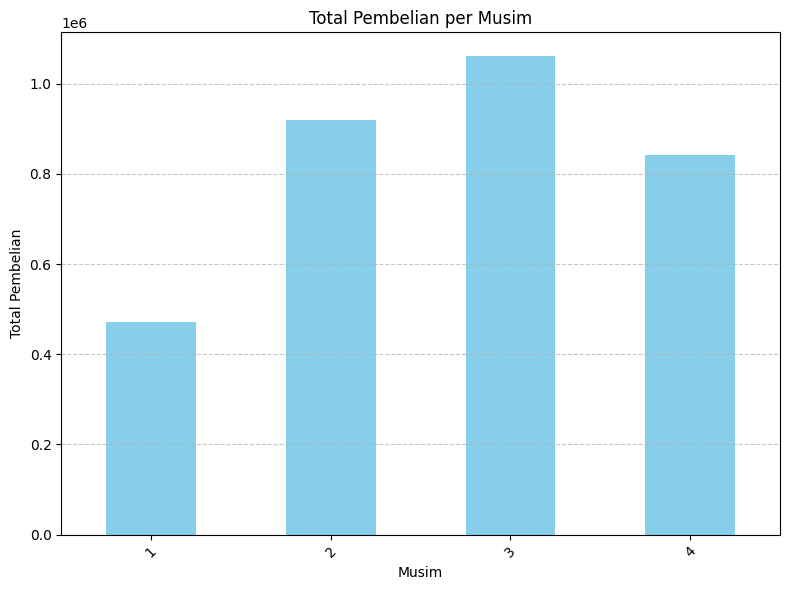

In [33]:
#Plot bar
plt.figure(figsize=(8, 6))
x_season.plot(kind='bar', color='skyblue')
plt.title('Total Pembelian per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Pembelian')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Untuk dataset dan pertanyaan yang saya ajukan, data tidak perlu di bersihkan lagi dan sudah bisa langsung di gunakan.

### Total penyewaan di hari kerja dan libur ?

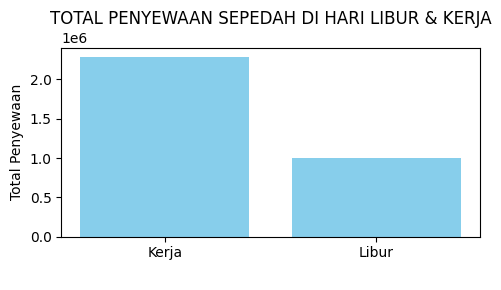

In [48]:
plt.figure(figsize=(5,3))
plt.bar(['Kerja', 'Libur'], [data_kerja['cnt'].sum(),data_libur['cnt'].sum()], color='skyblue')
plt.title('Total Penyewaan Sepedah di hari libur & Kerja'.upper())
plt.xlabel(' ')
plt.ylabel('Total Penyewaan')
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1 :
  Dapat terlihat jelas penyewan sepedah terbanyak pada musim 3 yaitu musim fall (gugur)

- Conclution pertanyaan 2 :
  dari hasil visualisasi dapat terlihat jelas penyewaan paling banyak di hari kerja